<a href="https://colab.research.google.com/github/lRAHULl/Deep-Learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
tf.__version__

'1.13.0-dev20190116'

In [4]:
# MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (i.e) reduce the values between 0 and 1.
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)

11493376/11490434 [==============================] - 23s 2us/step


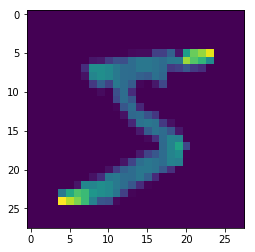

5



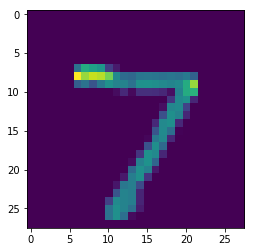

7


In [5]:
# plot the images and print the labels to check them
plt.imshow(X_train[0])
plt.show()
print(y_train[0])
print()
plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [6]:
# Print the pixels values (input to the neural net must in the form of tensors(n-D arrays))
print(X_train[0])
print(y_train[0])
print()
print()
print()
print(X_test[0])
print(y_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
from keras.models import Sequential
from keras.layers import Dense, ReLU, Softmax, Flatten

# Build the model
model = Sequential()

# The input layer takes the flattened image as input which in our case is (28 * 28 * 1) 
model.add(Flatten())

model.add(Dense(200))
model.add(ReLU())
model.add(Dense(200))
model.add(ReLU())
model.add(Dense(200))
model.add(ReLU())

model.add(Dense(10))
model.add(Softmax())

In [8]:
# Define some parameters for the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Train the model
model.fit(X_train, y_train, epochs = 5);

Epoch 1/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.2315 - acc: 0.9286
Epoch 2/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.0975 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0655 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0507 - acc: 0.9839
Epoch 5/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.0383 - acc: 0.9874


In [10]:
# Compute the validation loss(Test set loss), if there is more deviation in train and validation loss, our model is likely to be overfitting, 
# we must use certain techniques like Dropout or Regularization to reduce overfitting.
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)
# In our case the deviation is only around 1%, so the regularization is not necessary

10000/10000 [==============================] - 0s 31us/step
0.09158569449908682 0.9752


In [11]:
# predict the test set with the model
y_pred = model.predict(X_test)

In [12]:
y_pred # this outputs the probabilities of the labels (in our case: 0 - 9) which are predicted by our model. 

array([[9.92956065e-12, 1.37798239e-07, 3.37265107e-07, ...,
        9.99997735e-01, 9.84525350e-10, 2.04956663e-07],
       [2.63169590e-11, 1.85957791e-08, 9.99999881e-01, ...,
        2.63854916e-09, 3.65832954e-11, 6.20532597e-13],
       [2.74939733e-08, 9.99920726e-01, 3.73750117e-06, ...,
        1.18603675e-05, 4.43323806e-05, 1.97823852e-06],
       ...,
       [1.61209568e-09, 3.56398751e-08, 8.11569478e-08, ...,
        2.90055890e-08, 4.33721510e-07, 2.71276645e-06],
       [2.95629654e-09, 3.02357783e-08, 8.23086183e-11, ...,
        1.51449520e-08, 2.20151082e-06, 1.70213266e-09],
       [4.30643077e-08, 1.11875786e-11, 2.40694201e-11, ...,
        1.56138150e-13, 4.02231759e-09, 1.36782391e-11]], dtype=float32)

In [13]:
# We can check by randomly check the maximum probability in the each array of the prediction
print(np.argmax(y_pred[0]))
print(np.argmax(y_pred[9999]))

7
6


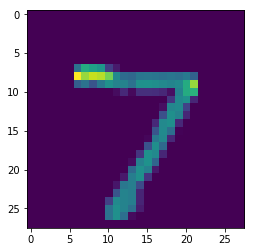

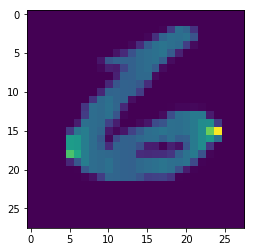

In [14]:
# The originals of the above predicted values
plt.imshow(X_test[0])
plt.show()
plt.imshow(X_test[9999])
plt.show()